In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [3]:
years=range(1880,2011)
pieces=[]

In [4]:
for year in years:
    path="babynames/yob%d.txt" %year
    frame = pd.read_csv(path, header=None, names=['name','sex','births'])
    frame['year']=year
    pieces.append(frame)

In [5]:
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


## 1. uni-sex 이름에 대해 시대별로 성별에 따른 경향 출력
Jaden
Kennedy
Reagan
Madison
Ieslie

In [59]:
# 연도와 이름에 대한 전체 출생수
total_births=names.pivot_table('births', index='year', columns=['sex','name'], aggfunc=sum)
total_births

sex          F                                                              \
name Aabriella Aaden Aadhya Aadi Aadison Aaditri Aadya Aadyn Aafreen Aagot   
year                                                                         
1880       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
1881       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
1882       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
1883       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
1884       NaN   NaN    NaN  NaN     NaN     NaN   NaN   NaN     NaN   NaN   
...        ...   ...    ...  ...     ...     ...   ...   ...     ...   ...   
2006       NaN   NaN    NaN  5.0     NaN     NaN  21.0   NaN     NaN   NaN   
2007       NaN   NaN   10.0  NaN     NaN     NaN  16.0   NaN     NaN   NaN   
2008       5.0   NaN    9.0  NaN     NaN     NaN  21.0   9.0     NaN   NaN   
2009       NaN   5.0   18.0  NaN     6.0     NaN  31.0   7.0     NaN   NaN   
2010       NaN   NaN   19.0  NaN     NaN     5.0  33.0   NaN     NaN   NaN   

sex   ...     M                                                                \
name  ... Zyron Zyrus Zysean Zyshaun Zyshawn Zyshon Zyshonne Zytavious Zyvion   
year  ...                                                                       
1880  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1881  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1882  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1883  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1884  ...   NaN   NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
...   ...   ...   ...    ...     ...     ...    ...      ...       ...    ...   
2006  ...   6.0   NaN    NaN     5.0     5.0    NaN      NaN       7.0    NaN   
2007  ...  22.0   NaN    NaN     7.0    11.0    NaN      NaN       6.0    NaN   
2008  ...   9.0   9.0    NaN     6.0    14.0    NaN      NaN       NaN    NaN   
2009  ...  14.0   NaN    NaN     NaN     7.0    NaN      NaN       7.0    5.0   
2010  ...   7.0   NaN    NaN     NaN     9.0    NaN      NaN       6.0    NaN   

sex         
name Zzyzx  
year        
1880   NaN  
1881   NaN  
1882   NaN  
1883   NaN  
1884   NaN  
...    ...  
2006   NaN  
2007   NaN  
2008   NaN  
2009   NaN  
2010   5.0  

[131 rows x 98148 columns]

In [63]:
unit_names_f = total_births['F'][['Jaden','Kennedy','Reagan','Madison','Iesha']]
unit_names_f

name,Jaden,Kennedy,Reagan,Madison,Iesha
year,,,,,
1880,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2006,1084.0,2898.0,2235.0,18599.0,36.0
2007,991.0,3051.0,2258.0,17918.0,31.0
2008,673.0,2945.0,2383.0,16985.0,21.0


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

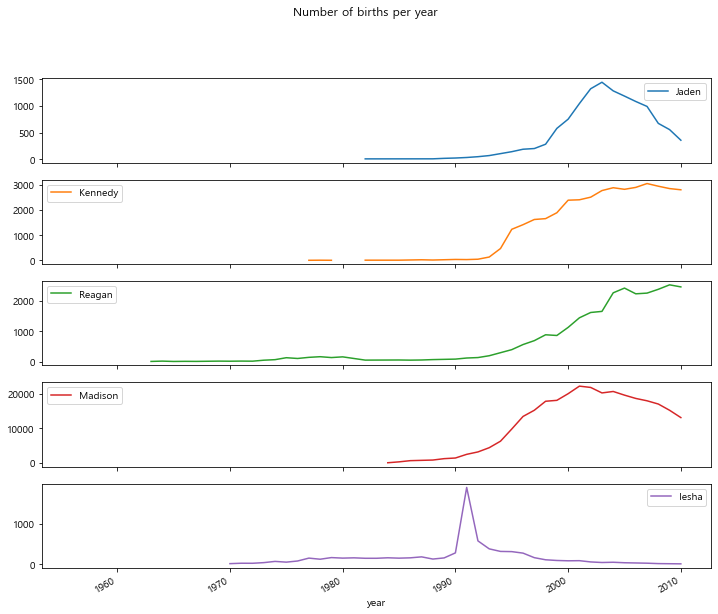

In [67]:
unit_names_f.plot(figsize=(12,10), subplots=True,
           title="Number of births per year")

In [64]:
unit_names_m = total_births['M'][['Jaden','Kennedy','Reagan','Madison','Iesha']]
unit_names_m

name,Jaden,Kennedy,Reagan,Madison,Iesha
year,,,,,
1880,NaN,NaN,NaN,22.0,NaN
1881,NaN,NaN,NaN,28.0,NaN
1882,NaN,NaN,NaN,27.0,NaN
1883,NaN,NaN,NaN,22.0,NaN
1884,NaN,NaN,NaN,20.0,NaN
...,...,...,...,...,...
2006,4934.0,178.0,260.0,67.0,NaN
2007,6239.0,153.0,246.0,69.0,NaN
2008,5171.0,166.0,204.0,57.0,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

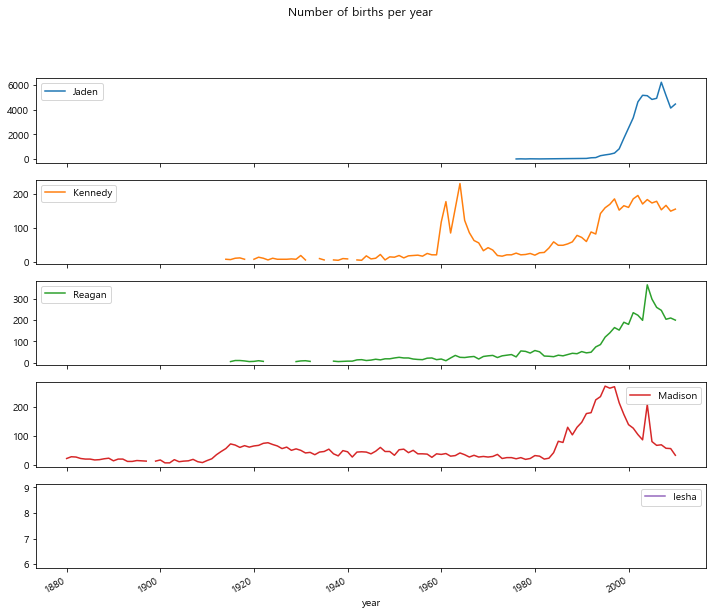

In [68]:
unit_names_m.plot(figsize=(12,10), subplots=True,
           title="Number of births per year")

Jaden,Kennedy,Reagan,Madison,Iesha
    1) 다섯 이름 중에는 여아의 이름으로 Madison이라는 이름이 가장 선호되었다.
    2) Madison이라는 이름은 
        여아의 경우, 2000년에서 2010년 사이에 급증하다 다시 감소하는 반면 
        남아의 이름으로 쓰인 것은 1980년대와 2010 사이이다. 
    3) Iesha라는 이름은 여아와 남아의 이름으로 다섯 이름 중 가장 낮은 선호도를 보였다.
        남아의 이름으로는 아예 사용되지 않았으며 여아의 이름으로 1990년대에 잠깐 나타났다.
    4) Kennedy라는 이름은
        여아의 경우, 1990년대 이후로 사용이 증가했으나,
        남아의 경우, 존 케네디 대통령 재임기간인 1961년에서 1963년까지 사용빈도가 높아졌다가 
                     이후 1990년대에 다시 사용하기 시작했다.
                     (유명인의 이름이 영향을 준 것으로 보인다)
        조금 의외인 점은, 1990년대 이후로는 남아보다 여아의 이름으로 훨씬 많이 선호되었다.

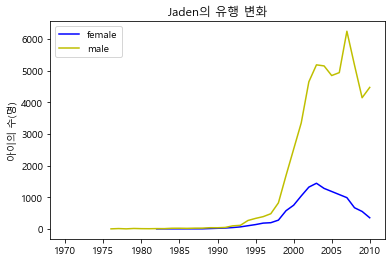

In [71]:
plt.plot(unit_names_f.index, unit_names_f.Jaden, 'b-', 
         unit_names_m.index, unit_names_m.Jaden, 'y-')
plt.title("Jaden의 유행 변화")
plt.ylabel("아이의 수(명)")
plt.legend(("female","male"), loc=2)
plt.show()

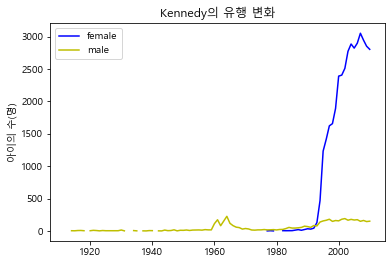

In [73]:
plt.plot(unit_names_f.index, unit_names_f.Kennedy, 'b-', 
         unit_names_m.index, unit_names_m.Kennedy, 'y-')
plt.title("Kennedy의 유행 변화")
plt.ylabel("아이의 수(명)")
plt.legend(("female","male"), loc=2)
plt.show()

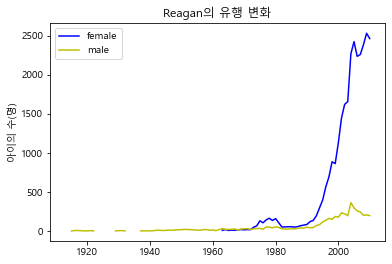

In [74]:
plt.plot(unit_names_f.index, unit_names_f.Reagan, 'b-', 
         unit_names_m.index, unit_names_m.Reagan, 'y-')
plt.title("Reagan의 유행 변화")
plt.ylabel("아이의 수(명)")
plt.legend(("female","male"), loc=2)
plt.show()

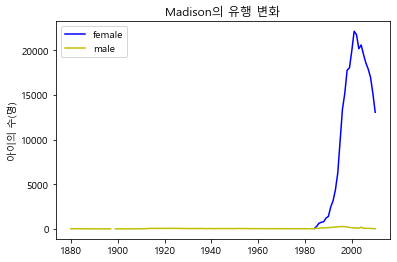

In [75]:
plt.plot(unit_names_f.index, unit_names_f.Madison, 'b-', 
         unit_names_m.index, unit_names_m.Madison, 'y-')
plt.title("Madison의 유행 변화")
plt.ylabel("아이의 수(명)")
plt.legend(("female","male"), loc=2)
plt.show()

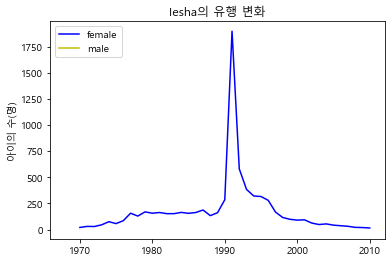

In [76]:
plt.plot(unit_names_f.index, unit_names_f.Iesha, 'b-', 
         unit_names_m.index, unit_names_m.Iesha, 'y-')
plt.title("Iesha의 유행 변화")
plt.ylabel("아이의 수(명)")
plt.legend(("female","male"), loc=2)
plt.show()

## 2. 유명인이 활동한 시기와 유명인의 이름이 유행한 시기가 일치한지 분석
ex) Michael Jackson(1970~ 인기가 있었음)

In [80]:
michael = names[names.name=='Michael'].pivot_table('births', index='year', columns='sex', aggfunc=sum)
michael

sex,F,M
year,,
1880,NaN,354.0
1881,NaN,298.0
1882,NaN,321.0
1883,NaN,307.0
1884,NaN,373.0
...,...,...
2006,64.0,22592.0
2007,51.0,21915.0
2008,55.0,20524.0


<AxesSubplot:xlabel='year'>

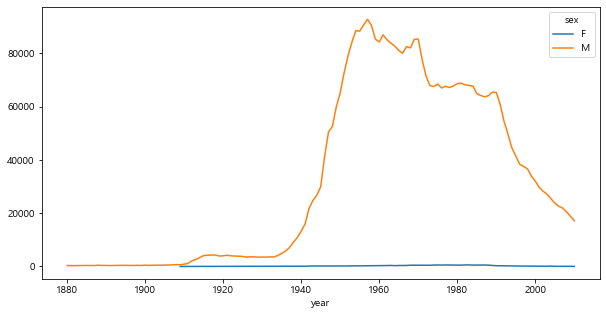

In [85]:
michael.plot(figsize=(10,5))

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

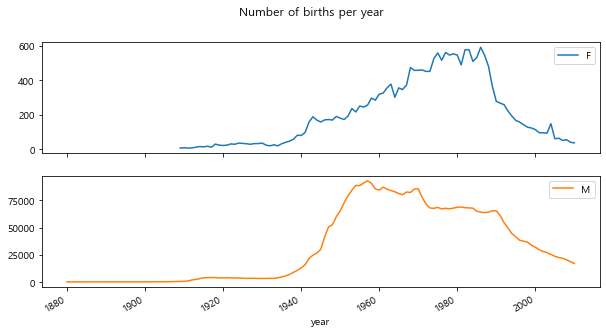

In [84]:
michael.plot(figsize=(10,5), subplots=True,
           title="Number of births per year")

여아보다는 남아에서 Michael이라는 이름의 선호가 높았다.
Michael Jackson의 활동은 1963년 잭슨 파이브부터 시작했으며, 
1971년~2009년까지 솔로 활동으로 인기가 높았다.
남아의 경우, Michael Jackson의 활동 이전부터 Michael에 대한 선호도가 존재했다.
             오히려 2000년대로 올수록 감소하는 양상을 보인다.
여아의 경우, Michael Jackson의 활동이전부터 선호가 있기는 했으나
             1980년대에 가장 높은 선호를 보인다.
             (남아보다는 Michael Jackson과의 연관성을 찾을 수 있었다.
             그러나 유의미하다고 보기에는 해당 이름을 사용하는 경우가 매우 적었다.)
             
이 경우, 유명인과의 관계성은 찾지 못했다.(오히려 위에서 진행한 Kennedy의 경우가 더 연관성이 있어보임)

## 3. 연도별/성별 이름의 길이 변화가 있는지 조사

In [89]:
names['length_name'] = names.name.map(lambda x: len(x))
names

,name,sex,births,year,length_name
0,Mary,F,7065,1880,4
1,Anna,F,2604,1880,4
2,Emma,F,2003,1880,4
3,Elizabeth,F,1939,1880,9
4,Minnie,F,1746,1880,6
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,7
1690780,Zyonne,M,5,2010,6
1690781,Zyquarius,M,5,2010,9
1690782,Zyran,M,5,2010,5


In [92]:
length = names.pivot_table('length_name', index='year', columns='sex', aggfunc="mean")
length

sex,F,M
year,,
1880,5.773885,5.634216
1881,5.750533,5.602808
1882,5.805447,5.647862
1883,5.771347,5.621359
1884,5.795222,5.633778
...,...,...
2006,6.320252,6.087788
2007,6.315595,6.085567
2008,6.326166,6.065387


<AxesSubplot:xlabel='year'>

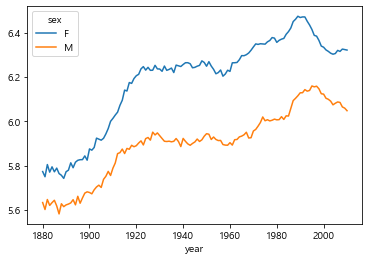

In [93]:
length.plot()

조사기간 내내 남아보다 여아 이름의 길이가 더 길다.
또한, 조사기간동안 이름의 길이가 점점 길어지는 양상을 보인다.
1880년대에서 1920년대까지는 길이의 차이가 크지 않다가 그 이후로 급격하게 차이가 벌어진다.

## 4. 타이타닉 데이터 시각화
- 성별, 승객실, 나이, 운임, 승선항구, 가족유무에 따른 생존자수 시각화

In [3]:
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
import seaborn as sns

In [44]:
titanic.Survived = titanic.Survived.astype('category')
titanic.Survived.dtype

CategoricalDtype(categories=['0', '1'], ordered=False)

<AxesSubplot:ylabel='female'>

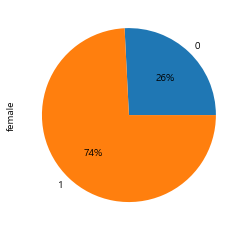

In [73]:
# 여성 생존 비율
titanic.groupby(['Sex','Survived']).size().female.plot.pie(autopct='%.f%%', ylabel="female")

<AxesSubplot:ylabel='male'>

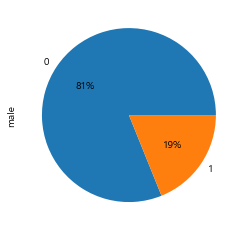

In [63]:
# 남성 생존비율
titanic.groupby(['Sex','Survived']).size().male.plot.pie(autopct='%.f%%', ylabel="male")

In [64]:
# 승객실과 생존자수 시각화
import plotnine as p9

In [82]:
titanic.Survived = titanic.Survived.astype('int')
titanic.Survived.dtype

dtype('int32')

In [83]:
pclass_surv = titanic.groupby(['Pclass','Sex']).Survived.sum().reset_index()
pclass_surv

,Pclass,Sex,Survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


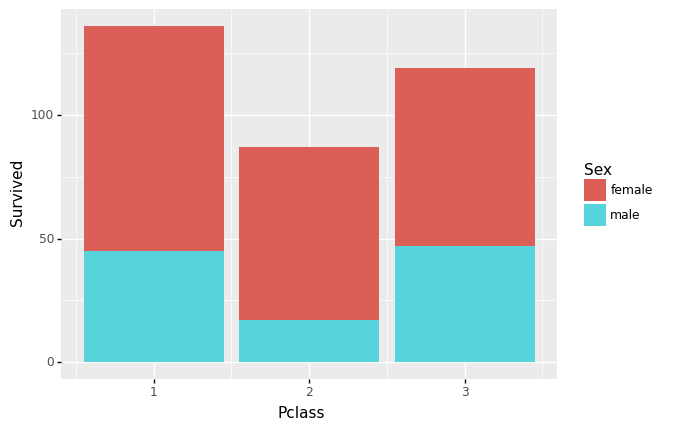

<ggplot: (148415045386)>

In [84]:
p9.ggplot(data=pclass_surv, mapping=p9.aes(x='Pclass', y='Survived', fill='Sex'))+p9.geom_bar(stat="identity")

In [90]:
# 나이와 생존자수 시각화
bins = list(range(0, 81, 10))
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [92]:
titanic['Age_cut'] = pd.cut(titanic["Age"], bins, right=False)
titanic['Age_cut']

0      [20.0, 30.0)
1      [30.0, 40.0)
2      [20.0, 30.0)
3      [30.0, 40.0)
4      [30.0, 40.0)
           ...     
886    [20.0, 30.0)
887    [10.0, 20.0)
888             NaN
889    [20.0, 30.0)
890    [30.0, 40.0)
Name: Age_cut, Length: 891, dtype: category
Categories (8, interval[int64]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)]

In [98]:
agecut_surv = titanic.groupby(['Age_cut','Sex']).Survived.sum().reset_index()
agecut_surv

,Age_cut,Sex,Survived
0,"[0, 10)",female,19.0
1,"[0, 10)",male,19.0
2,"[10, 20)",female,34.0
3,"[10, 20)",male,7.0
4,"[20, 30)",female,52.0
5,"[20, 30)",male,25.0
6,"[30, 40)",female,50.0
7,"[30, 40)",male,23.0
8,"[40, 50)",female,22.0
9,"[40, 50)",male,12.0


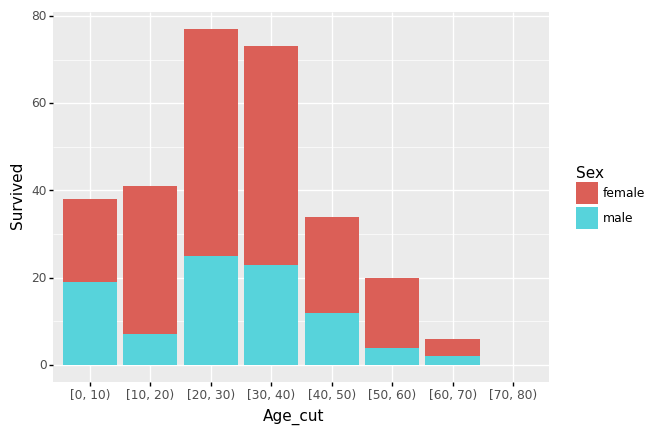

<ggplot: (148414951653)>

In [99]:
p9.ggplot(data=agecut_surv, mapping=p9.aes(x='Age_cut', y='Survived', fill='Sex'))+p9.geom_bar(stat="identity")

In [107]:
# 운임과 생존자수 시각화
bins = list(range(0, 521, 40))
bins

[0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520]

In [108]:
titanic['Fare_cut'] = pd.cut(titanic["Fare"], bins, right=False)
titanic['Fare_cut']

0       [0, 40)
1      [40, 80)
2       [0, 40)
3      [40, 80)
4       [0, 40)
         ...   
886     [0, 40)
887     [0, 40)
888     [0, 40)
889     [0, 40)
890     [0, 40)
Name: Fare_cut, Length: 891, dtype: category
Categories (13, interval[int64]): [[0, 40) < [40, 80) < [80, 120) < [120, 160) ... [360, 400) < [400, 440) < [440, 480) < [480, 520)]

In [109]:
farecut_surv = titanic.groupby(['Fare_cut','Sex']).Survived.sum().reset_index()
farecut_surv

,Fare_cut,Sex,Survived
0,"[0, 40)",female,147.0
1,"[0, 40)",male,82.0
2,"[40, 80)",female,38.0
3,"[40, 80)",male,16.0
4,"[80, 120)",female,22.0
5,"[80, 120)",male,5.0
6,"[120, 160)",female,12.0
7,"[120, 160)",male,4.0
8,"[160, 200)",female,2.0
9,"[160, 200)",male,NaN


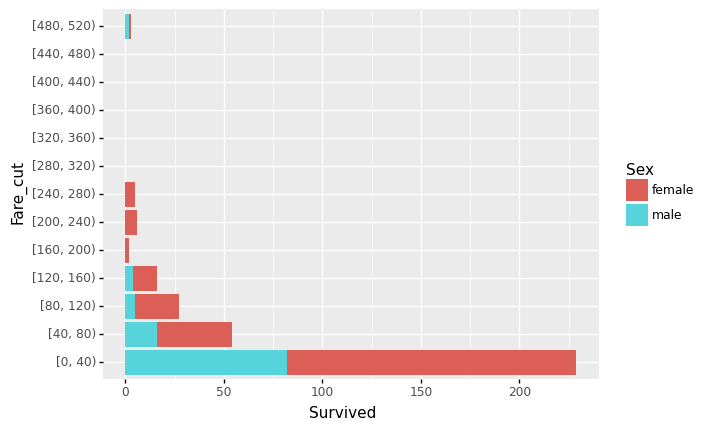

<ggplot: (148415214174)>

In [112]:
p9.ggplot(data=farecut_surv, mapping=p9.aes(x='Fare_cut', y='Survived', fill='Sex'))+p9.geom_bar(stat="identity")+p9.coord_flip()

In [113]:
# 승선항구와 생존자수 시각화
embarked_surv = titanic.groupby(['Embarked','Sex']).Survived.sum().reset_index()
embarked_surv

,Embarked,Sex,Survived
0,C,female,64
1,C,male,29
2,Q,female,27
3,Q,male,3
4,S,female,140
5,S,male,77


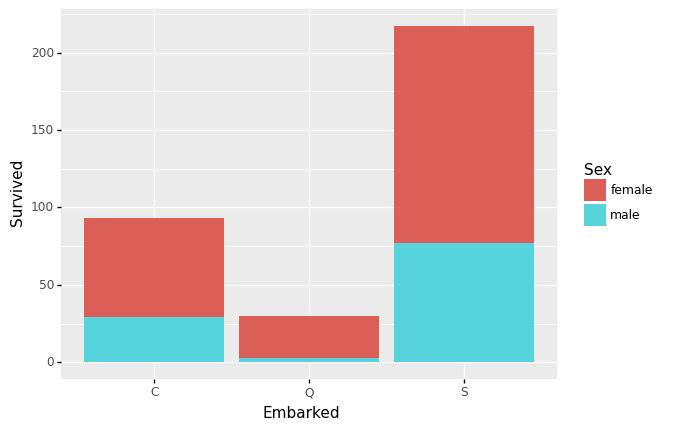

<ggplot: (148415450257)>

In [114]:
p9.ggplot(data=embarked_surv, mapping=p9.aes(x='Embarked', y='Survived', fill='Sex'))+p9.geom_bar(stat="identity")